# Coursera Capstone Project

## Introduction Section

### Project Topic: Where is the best location for our new-open appartment?

#### 1. Project Background Statement

We are looking for a place to start up our new apartment in Texas. Texas is growing very fast recently. A lot of constructions are ongoing here and there. New apartments, new restaurants can be found anywhere in Texas. As an individual who have lived in Texas for almost five years, I really feel the development of the State. As a third-populated state in the US, living in Texas is very comfortable and relaxed. The traffic is good here as well as the public transportation system. As the expanding economy and population of Texas, the demand of new apartment is increasing dramatically. Therefore, we believe that a new apartment business in Texas will be profitable and worth investing.

#### 2. Project Target Statement

In this project, we are going to use Foursquare API to get information and analysis the data we obtained, to make a decision where (which city in Texas) will be the new apartment located.

## Data Section

1. All the city information includling Name, population, household income, crimial rate, etc. (probabily from Webs)
2. popularity of the city - numbers of parks, markets, schools, hospitals. (probabily from Foursquare API)

In [3]:
url1 = 'https://www.tsl.texas.gov/ref/abouttx/popcity32010.html' # city population
url2 = 'https://www.indexmundi.com/facts/united-states/quick-facts/texas/median-household-income/cities#table' # household income data
url3 = 'https://www.indexmundi.com/facts/united-states/quick-facts/texas/average-commute-time/cities#table'# mean travel time to work
url4 = 'http://www.usa.com/rank/texas-state--crime-index--city-rank.htm?hl=&hlst=&wist=&yr=&dis=&sb=ASC&plow=&phigh=&ps=' # city criminal index

In [4]:
# Install and import all the libraries:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import numpy as np

from bs4 import BeautifulSoup

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

In [7]:
# create a object to handle the contents of targeting website
# city population
population = requests.get(url1).text
soup_pop = BeautifulSoup(population,'lxml')
# household income
income = requests.get(url2).text
soup_income = BeautifulSoup(income,'lxml')
# average travel time to work
travel_time = requests.get(url3).text
soup_tt = BeautifulSoup(travel_time,'lxml')
# city criminal index 
criminal_index = requests.get(url4).text
soup_ci = BeautifulSoup(criminal_index,'lxml')

Following table is the population, average income, mean travel time to work, and the crime index of Texas Cities

In [11]:
# find the table in the targeting website and convert them into panda dataframe
# 1. the city population
population_table = soup_pop.find('table')
#print(population_table.prettify())

population_table_rows = population_table.find_all('tr')
population_data = []
for tr in population_table_rows:
    td = tr.find_all('td') 
    row = [i.text.replace('\n','').replace('\t','').replace(' city','').replace(' CDP','').replace(' town','').replace(',','') for i in td] # remove \n \t and _city in the text with nothing
    population_data.append(row)

population_data = population_data[1:]
#print (population_data)

df_pop = pd.DataFrame(population_data, columns = ['City Name','Population'])
df_pop = df_pop.drop([0],axis = 0)
df_pop = df_pop.reset_index(drop = True)
df_pop['City Name'] = df_pop['City Name'].str.title()
df_pop['Population']=df_pop['Population'].astype(int)
df_pop.head(5)
#df_pop.dtypes


,City Name,Population
0,Houston,2099451
1,San Antonio,1327407
2,Dallas,1197816
3,Austin,790390
4,Fort Worth,741206


In [12]:
print('The size of the table is {}'.format(df_pop.shape))

The size of the table is (1752, 2)


In [16]:
# 2 The household income
income_table = soup_income.findAll('table')[1]
#print(income_table.prettify())

income_table_rows = income_table.find_all('tr')
income_data = []
for tr in income_table_rows:
    td = tr.find_all('td')
    row = [i.text.replace(',','') for i in td]
    income_data.append(row)
    
income_data = income_data[1:]
#print(income_data)

df_income = pd.DataFrame(income_data, columns = ['City Name','Household Income Value ($)'])
df_income['City Name'] = df_income['City Name'].str.title()
df_income['Household Income Value ($)']=df_income['Household Income Value ($)'].astype(int)
df_income.head(5)
#print(df_income.dtypes)

,City Name,Household Income Value ($)
0,Abilene,47689
1,Addison,73383
2,Alamo,39275
3,Alamo Heights,132313
4,Aldine,38964


In [17]:
print('The size of the table is {}'.format(df_income.shape))

The size of the table is (379, 2)


In [21]:
# 3 Mean time travel to work
tt_table = soup_tt.findAll('table')[1]
#print(tt_table.prettify())

tt_table_rows = tt_table.find_all('tr')
tt_data = []
for tr in tt_table_rows:
    td = tr.find_all('td')
    row = [i.text for i in td]
    tt_data.append(row)
    
tt_data = tt_data[1:]
#print(tt_data)

df_tt = pd.DataFrame(tt_data, columns = ['City Name','Mean Travel Time (min)'])
df_tt['City Name'] = df_tt['City Name'].str.title()

df_tt['Mean Travel Time (min)']=pd.to_numeric(df_tt['Mean Travel Time (min)'])
#print(df_tt)
df_tt.head(5)
#print(df_tt.dtypes)

,City Name,Mean Travel Time (min)
0,Abilene,15.6
1,Addison,22.1
2,Alamo,20.7
3,Alamo Heights,19.0
4,Aldine,31.4


In [40]:
print('The size of the table is {}'.format(df_tt.shape))

The size of the table is (379, 2)


In [41]:
# 4 Crime Index
ci_table = soup_ci.findAll('table')[1]
#print(ci_table.prettify())

ci_table_rows = ci_table.find_all('tr')
ci_data = []
for tr in ci_table_rows:
    td = tr.find_all('td')
    row = [i.text for i in td]
    ci_data.append(row)

ci_data = ci_data[1:]
#print(ci_data)

df_ci = pd.DataFrame(ci_data, columns = ['Rank','Crime Index','City Name/ Population'])
df_ci.head()

,Rank,Crime Index,City Name/ Population
0,1.,0,"Kempner, TX / 1,133"
1,2.,23,"Brackettville, TX / 2,070"
2,3.,52,"Bloomburg, TX / 307"
3,4.,135,"Crowell, TX / 811"
4,5.,160,"O'donnell, TX / 982"


In [42]:
cc_data = []
for rows in df_ci['City Name/ Population']:
    rows = rows.split(',', 1)[0]
    cc_data.append(rows)
cc_data = cc_data[0:]

df_cc = pd.DataFrame(cc_data , columns = ['City Name'])
df_cc.head()

,City Name
0,Kempner
1,Brackettville
2,Bloomburg
3,Crowell
4,O'donnell


In [50]:
df_ci_re = [df_cc['City Name'], df_ci['Crime Index']]
df_ci_re = pd.concat(df_ci_re, axis =1)
df_ci_re['City Name'] = df_ci_re['City Name'].str.title()
df_ci_re['Crime Index']=df_ci_re['Crime Index'].str.replace(',','').astype(int)
#df_ci_re.head(500)
#print(df_ci_re)
#print(df_ci_re.dtypes)

City Name      object
Crime Index     int64
dtype: object


In [51]:
print('The size of the table is {}'.format(df_ci_re.shape))

The size of the table is (692, 2)


Join the tables above to combine all information together

In [52]:
df_texas1 = df_pop.join(df_income.set_index('City Name'), on = 'City Name')
df_texas2 = df_texas1.join(df_tt.set_index('City Name'),on = 'City Name')
df_texas_join = df_texas2.join(df_ci_re.set_index('City Name'),on = 'City Name')
#df_texas_data.head()
#print(df_texas_join)

In [54]:
df_texas_join_re = df_texas_join.dropna().reset_index(drop = True)
df_texas_join_re.head(50)
#print(df_texas_join_re.dtypes)


,City Name,Population,Household Income Value ($),Mean Travel Time (min),Crime Index
0,Houston,2099451,51140.0,27.4,3419.0
1,San Antonio,1327407,50980.0,24.4,2921.0
2,Dallas,1197816,50100.0,27.0,3369.0
3,Austin,790390,67462.0,24.3,2455.0
4,Fort Worth,741206,59255.0,27.2,2688.0
5,El Paso,649121,45656.0,22.8,1496.0
6,Arlington,365438,58502.0,27.2,2454.0
7,Corpus Christi,305215,55709.0,19.2,2822.0
8,Plano,259841,92121.0,26.9,1168.0
9,Laredo,236091,43351.0,21.1,2375.0


## Data Analysis Section

Basing on the data I collected for the cities in TX state, there are 4 major concerns, population, household income, mean travel time, and crime index. Apparently, large population, high household income, low travel time, and low crime index will make the new-built apartment more likely profitable. Therefore, in the following analysis, I am going to sort out the most appropriate place to build a new apartment.

In [55]:
df_data = df_texas_join_re.sort_values(["Population","Household Income Value ($)","Mean Travel Time (min)","Crime Index"], ascending = (False, False, True, True))
df_data.head(5)

,City Name,Population,Household Income Value ($),Mean Travel Time (min),Crime Index
0,Houston,2099451,51140.0,27.4,3419.0
1,San Antonio,1327407,50980.0,24.4,2921.0
2,Dallas,1197816,50100.0,27.0,3369.0
3,Austin,790390,67462.0,24.3,2455.0
4,Fort Worth,741206,59255.0,27.2,2688.0


In [98]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [172]:
population=df_texas_join_re["Population"].values
household=df_texas_join_re["Household Income Value ($)"].values
meantravel=df_texas_join_re["Mean Travel Time (min)"].values
criminalind=df_texas_join_re["Crime Index"].values

X0=np.ones((333));
population_X0=np.concatenate(([X0],[population])).transpose()
#print(population)

In [173]:
regr1=LinearRegression().fit(population_X0,household)
household_p=regr1.predict(population_X0)

In [174]:
regr2=LinearRegression().fit(population_X0,meantravel)
meantravel_p=regr2.predict(population_X0)
regr3=LinearRegression().fit(population_X0,criminalind)
criminalind_p=regr3.predict(population_X0)

In [175]:
#coefficients
print("Coefficients for household income: \n", regr1.coef_)
print("Coefficients for mean travel time: \n", regr2.coef_)
print("Coefficients for criminal index: \n", regr3.coef_)


Coefficients for household income: 
 [ 0.         -0.00331832]
Coefficients for mean travel time: 
 [0.00000000e+00 1.46948418e-06]
Coefficients for criminal index: 
 [0.         0.00105864]


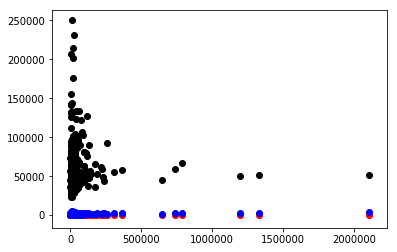

In [176]:
#plot output
plt.scatter(population, household, color='black')
plt.scatter(population, meantravel, color='red')
plt.scatter(population, criminalind, color='blue')

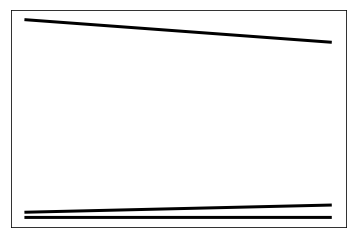

In [177]:
plt.plot(population, household_p, color='black', linewidth=3, label ='household income')
plt.plot(population, meantravel_p, color='black', linewidth=3, label = 'mean travel time')
plt.plot(population, criminalind_p, color='black', linewidth=3, label= 'criminal index')

plt.xticks(())
plt.yticks(())
plt.show()